---
# SOLUTIONS
---


## Recursive computation of determinant.

In [36]:
def determinant(A):
    """Compute the determinant of a square matrix A (list of lists)."""

    n = len(A)
    # sanity check: square matrix
    if any(len(row) != n for row in A):
        raise ValueError("determinant is only defined for square matrices")

    det = 0
    if n == 1:
        det = A[0][0]
    elif n == 2:
        det = A[0][0] * A[1][1] - A[0][1] * A[1][0]
    else:
        for c in range(n):
            minor = [row[:c] + row[c + 1 :] for row in A[1:]]
            det += ((-1) ** c) * A[0][c] * determinant(minor)
    return det



## Simple Gaussian elimination

This method performs in $\mathcal O(n^3)$ on account of its three nested loops.

In [37]:
def gaussian_elimination(A, b):
    """
    Solve Ax = b using Gaussian elimination without pivoting.
    Assumes:
      - A is n x n (list of lists)
      - b is length n (list)
      - All diagonal pivots are non-zero (so no pivoting needed)
    Returns:
      - x as a list of floats
    """
    n = len(A)

    # Build augmented matrix [A | b]
    M = []
    for i in range(n):
        row = []
        for val in A[i]:
            row.append(float(val))
        row.append(float(b[i]))
        M.append(row)

    # Forward elimination
    for k in range(n - 1):
        pivot = M[k][k]
        if pivot == 0:
            # With our assumption this "shouldn't happen", but guard anyway.
            raise ValueError("Zero pivot encountered; pivoting required.")

        i = k + 1
        while i < n:
            factor = M[i][k] / pivot

            j = k
            while j <= n:
                M[i][j] = M[i][j] - factor * M[k][j]
                j = j + 1

            i = i + 1

    # Back substitution - not required for the assignment
    x = [0.0] * n

    i = n - 1
    while i >= 0:
        sum_ax = 0.0

        j = i + 1
        while j < n:
            sum_ax = sum_ax + M[i][j] * x[j]
            j = j + 1

        x[i] = (M[i][n] - sum_ax) / M[i][i]
        i = i - 1

    return x


## Matrix generator

A method to generate a matrix with random values.

In [38]:
import random

def random_matrix(
    m: int = 4, n: int = 4, low: int = -10, high: int = 10, no_zeroes: bool = True
):
    """Generate a random m x n matrix with entries between low and high."""

    matrix: list[list[int]] = []

    for i in range(m):
        row: list[int] = []
        for j in range(n):
            value: int = random.randint(low, high)
            while no_zeroes and value == 0:
                value = random.randint(low, high)
            row.append(value)

        # append the row normally
        matrix.append(row)

    # single return statement
    return matrix


## Matrix to string

For some nicely formatted printouts, if needed (not used in this assignment).

In [39]:
def arr_str(array):
    """Return a string representation of a 2D array."""
    array_string = f"["
    n = len(array)
    for i in range(n):
        array_string = array_string if i == 0 else array_string + " "
        for j in range(n):
            array_string += f"{array[i][j]:5d}"
        array_string = array_string + "\n" if i < n - 1 else array_string + " ]"
    return array_string

## Measuring performance

We only compute actual time for the determinant computation. For Gaussian elimination we compute a $\mathcal O(n^3)$ estimation based on the tight bound $2n^3/3$. Data are plotted using matplotlib instead of using a spreadsheet.

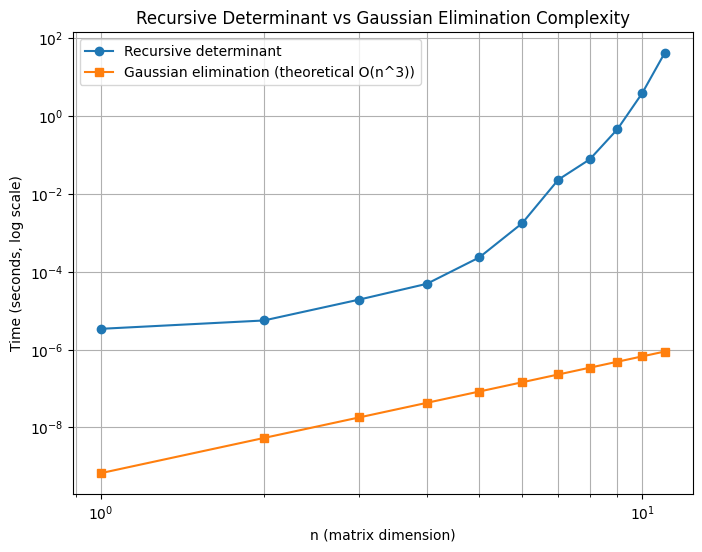

Plot saved to performance_comparison.png


<Figure size 640x480 with 0 Axes>

In [40]:
import time
import matplotlib.pyplot as plt


def estimated_gaussian_time(n: int, seconds_per_op: float = 1e-9) -> float:
    """
    Estimate time for Gaussian elimination on an n x (n+1) matrix.
    We use the tight bound T(n) ≈ (2/3) n^3 operations.
    """
    ops = (2 / 3) * (n ** 3)
    return ops * seconds_per_op


def measure_performance(time_limit: float = 0.1) -> None:
    """
    Measure performance of the recursive determinant and compare it
    with the O(n^3) Gaussian elimination bound.

    time_limit: allowed time in *minutes* before stopping.
    """
    n = 1
    time_exceeded = False

    recursive_ns: list[int] = []
    recursive_times: list[float] = []
    gaussian_estimates: list[float] = []



    while not time_exceeded:

        # --- Build random n×n matrix ---
        A = random_matrix(n,n, no_zeroes=True)

        # --- Time recursive determinant ---
        start = time.time_ns()
        det = determinant(A)
        stop = time.time_ns()

        duration = (stop - start) / 1_000_000_000  # convert ns → seconds

        # --- Log measured time ---
        recursive_ns.append(n)
        recursive_times.append(duration)

        # --- Compute theoretical Gaussian elimination time ---
        gaussian_estimates.append(estimated_gaussian_time(n))

        # Optionally store data (your original behavior)
        with open("recursive_timing.txt", "a") as f:
            f.write(f"{n},{duration}\n")

        with open("gaussian_timing.txt", "a") as f:
            f.write(f"{n},{gaussian_estimates[-1]}\n")

        # --- Check exit condition (minutes → seconds) ---
        time_exceeded = duration > time_limit * 60
        n += 1

    # --- Produce comparison graph ---
    plt.figure(figsize=(8, 6))
    plt.loglog(recursive_ns, recursive_times, "o-", label="Recursive determinant")
    plt.loglog(recursive_ns, gaussian_estimates, "s-", label="Gaussian elimination (theoretical O(n^3))")

    plt.xlabel("n (matrix dimension)")
    plt.ylabel("Time (seconds, log scale)")
    plt.title("Recursive Determinant vs Gaussian Elimination Complexity")
    plt.legend()
    plt.grid(True, which="both")
    plt.show()

    plt.savefig("performance_comparison.png", dpi=200)
    print("Plot saved to performance_comparison.png")


if __name__ == "__main__":
    measure_performance()
